### Second Project

In [44]:
using Plots, ROCAnalysis, GLM, MLBase, Lathe, Distributions, LaTeXStrings, CSV, DataFrames, StatsBase, Missings, XLSX, Dates
using IJulia: readprompt

#### Q1

In [8]:
dff = DataFrame(XLSX.readtable("crypto_currency.xlsx", "Sheet1")...)

,name,ticket,market cap,last price($)
,Any,Any,Any,Any
1,Bitcoin,BTC,750B,39K
2,Ethereum,ETH,360B,3K
3,Ripple,XRP,50B,0.7
4,Solana,SOL,34B,100
5,Terra,LUNA,32B,91
6,Cardano,ADA,30B,0.9
7,Avalanche,AVAX,20B,73
8,Polkadot,DOT,19B,19
9,Dogecoin,DOGE,18B,0.13


In [110]:
selected_rows = findall(x->x ∈ sort(dff."market cap", rev=true)[1:5], dff."market cap")
top_five=df[selected_rows,:]
for i in top_five."last price(\$)"
    if typeof(i) == String && contains(i, "K") == true
        replace!(top_five."last price(\$)", i=>parse(Int, chop(i))*1000)
    end
end
top_five

,name,ticket,market cap,last price($)
,Any,Any,Any,Any
1,Bitcoin,BTC,750B,39K
2,Ethereum,ETH,360B,3K
3,Ripple,XRP,50B,0.7
4,Solana,SOL,34B,100
5,Terra,LUNA,32B,91


##### *sclaing data*
$$
x := \frac{x - \mu}{\sigma}
$$

##### Main procedure


In [209]:
df = DataFrame("Date" => reverse!(vec(convert(Array, select!(CSV.read("BTC-USD.csv", DataFrame), "Date")))),
     "Bitcoin" => reverse!(vec(convert(Array, select!(CSV.read("BTC-USD.csv", DataFrame), "Close")))),
     "Ethereum"=> reverse!(vec(convert(Array, select!(CSV.read("ETH-USD.csv", DataFrame), "Close")))), 
     "Ripple"=> reverse!(vec(convert(Array, select!(CSV.read("XRP-USD.csv", DataFrame), "Close")))),
     "Solana"=> reverse!(vec(convert(Array, select!(CSV.read("SOL-USD.csv", DataFrame), "Close")))), 
     "Terra"=> reverse!(vec(convert(Array, select!(CSV.read("LUNA-USD.csv", DataFrame), "Close")))),
     "Cardano"=> reverse!(vec(convert(Array, select!(CSV.read("ADA-USD.csv", DataFrame), "Close")))), 
     "Avalanche"=> reverse!(vec(convert(Array, select!(CSV.read("AVAX-USD.csv", DataFrame), "Close")))), 
     "Polkadot"=> reverse!(vec(convert(Array, select!(CSV.read("DOT-USD.csv", DataFrame), "Close")))),
     "Dogecoin"=> reverse!(vec(convert(Array, select!(CSV.read("DOGE-USD.csv", DataFrame), "Close")))), 
     "Polygon"=> reverse!(vec(convert(Array, select!(CSV.read("MATIC-USD.csv", DataFrame), "Close")))))

#preprocessing data


,Date,Bitcoin,Ethereum,Ripple,Solana,Terra,Cardano,Avalanche
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2022-04-17,39717.0,2993.4,0.753154,100.41,0.004766,0.917466,75.7093
2,2022-04-16,40424.5,3062.31,0.781841,102.257,0.004851,0.95264,77.8903
3,2022-04-15,40553.5,3040.92,0.785675,101.31,0.004866,0.954717,77.4375
4,2022-04-14,39935.5,3019.91,0.726819,100.708,0.004792,0.932412,76.8179
5,2022-04-13,41166.7,3118.34,0.72385,105.002,0.00494,0.974696,80.002
6,2022-04-12,40127.2,3030.38,0.716614,103.306,0.004815,0.955145,76.3601
7,2022-04-11,39521.9,2981.05,0.695023,99.3391,0.004743,0.92045,74.1726
8,2022-04-10,42207.7,3211.87,0.756614,111.742,0.005065,1.03089,81.8165
9,2022-04-09,42782.1,3261.92,0.763585,112.973,0.00385,1.04502,84.5946


In [210]:
Polkadot_ = [0.0 for i in 1:366]
sum=0.0
tot=0.0
for (n, value) in enumerate(df."Polkadot")
    if value != "null"
        Polkadot_[n]=parse(Float64, value) 
        sum += Polkadot_[n]
        tot += 1  
    end
end
avg = sum/tot
Polkadot_[findall(x->x==0.0, Polkadot_)] .= avg
# deleting the previous column and adding the new one
df = select!(df, Not(:Polkadot))
#insert!(df, 9, Polkadot_, :Polkadot)
df.Polkadot = Polkadot_
df

,Date,Bitcoin,Ethereum,Ripple,Solana,Terra,Cardano,Avalanche
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2022-04-17,39717.0,2993.4,0.753154,100.41,0.004766,0.917466,75.7093
2,2022-04-16,40424.5,3062.31,0.781841,102.257,0.004851,0.95264,77.8903
3,2022-04-15,40553.5,3040.92,0.785675,101.31,0.004866,0.954717,77.4375
4,2022-04-14,39935.5,3019.91,0.726819,100.708,0.004792,0.932412,76.8179
5,2022-04-13,41166.7,3118.34,0.72385,105.002,0.00494,0.974696,80.002
6,2022-04-12,40127.2,3030.38,0.716614,103.306,0.004815,0.955145,76.3601
7,2022-04-11,39521.9,2981.05,0.695023,99.3391,0.004743,0.92045,74.1726
8,2022-04-10,42207.7,3211.87,0.756614,111.742,0.005065,1.03089,81.8165
9,2022-04-09,42782.1,3261.92,0.763585,112.973,0.00385,1.04502,84.5946


In [ ]:
#insert!(df, 9, Polkadot_, :Polkadot)

In [ ]:
# for i in 2:10
#     replace!(x -> x == "null" ? 0.0 : x , df[!,i])
# end

In [211]:
for i in 2:11
    replace!(x -> (x - mean(df[!,i]))/var(df[!,i]), df[!,i])
end

In [212]:
#scaled data
top_five = select!(df, 1:6)

,Date,Bitcoin,Ethereum,Ripple,Solana,Terra
,Date,Float64,Float64,Float64,Float64,Float64
1,2022-04-17,-7.95862e-5,-0.000334343,-3.10637,-0.00189925,-755.338
2,2022-04-16,-6.39329e-5,-0.000177473,-1.37455,-0.00137858,0.00132222
3,2022-04-15,-5.70016e-5,-0.000191667,-1.1223,-0.00152639,0.00132223
4,2022-04-14,-5.90565e-5,-0.000204088,-1.44171,-0.00159147,0.00132219
5,2022-04-13,-4.19321e-5,-2.62957e-5,-1.26963,-0.00051387,0.00132229
6,2022-04-12,-4.86765e-5,-0.00014599,-1.17661,-0.000836356,0.00132222
7,2022-04-11,-5.07777e-5,-0.000200258,-1.19243,-0.00167762,0.00132218
8,2022-04-10,-2.38164e-5,0.000143271,-0.742328,0.00122784,0.00132239
9,2022-04-09,-1.69432e-5,0.000217911,-0.654338,0.0015674,0.00132162


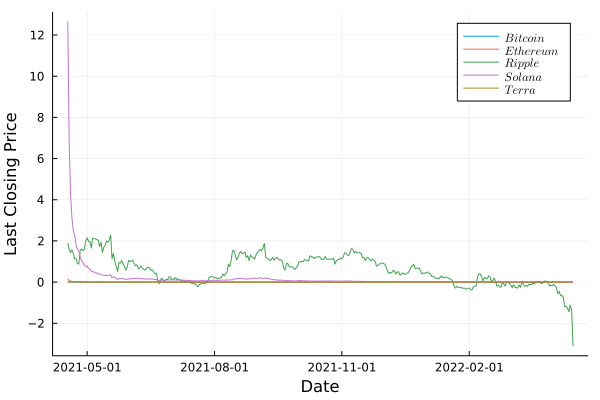

In [213]:
dr = Date(2021,04,17):Day(1):Date(2022,04,17)
plot()
for i in 2:5
    name_ = names(df)[i]
    plot!(reverse!(collect(dr)),df[!,i], label=L"%$name_")
end
plot!(reverse!(collect(dr))[2:366],df[2:366,6], label=L"Terra", xlabel= "Date", ylabel= "Last Closing Price")

### Formula of cryptocurrencies returns:
$$
r = log(\frac{p\\_t}{p\\_t\\_-\\_1})
$$
Where $p\\_t$ is the closing price at time t, and $p\\_t\\_-\\_1$ is the closing price at time t+1.

In [ ]:
r = log()

### Q2